In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
from sklearn.datasets import fetch_20newsgroups
newsgroups__= fetch_20newsgroups(subset='all')
newsgroups= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

In [3]:
from pprint import pprint
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
newsgroups.filenames.shape


(18846,)

In [5]:
newsgroups.target.shape

(18846,)

In [6]:
newsgroups.target[:10]


array([10,  3, 17,  3,  4, 12,  4, 10, 10, 19])

In [7]:
newsgroups.data[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [8]:
newsgroups.data[2]

'\n\n\n\n\tFinally you said what you dream about. Mediterranean???? That was new....\n\tThe area will be "greater" after some years, like your "holocaust" numbers......\n\n\n\n\n\t\t*****\n\tIs\'t July in USA now????? Here in Sweden it\'s April and still cold.\n\tOr have you changed your calendar???\n\n\n\t\t\t\t\t\t    ****************\n\t\t\t\t\t\t    ******************\n\t\t\t    ***************\n\n\n\tNOTHING OF THE MENTIONED IS TRUE, BUT LET SAY IT\'s TRUE.\n\t\n\tSHALL THE AZERI WOMEN AND CHILDREN GOING TO PAY THE PRICE WITH\n\t\t\t\t\t\t    **************\n\tBEING RAPED, KILLED AND TORTURED BY THE ARMENIANS??????????\n\t\n\tHAVE YOU HEARDED SOMETHING CALLED: "GENEVA CONVENTION"???????\n\tYOU FACIST!!!!!\n\n\n\n\tOhhh i forgot, this is how Armenians fight, nobody has forgot\n\tyou killings, rapings and torture against the Kurds and Turks once\n\tupon a time!\n      \n       \n\n\nOhhhh so swedish RedCross workers do lie they too? What ever you say\n"regional killer", if you don\'

In [9]:
# Create a DataFrame from the dataset
df = pd.DataFrame({'text': newsgroups.data, 'label': newsgroups.target})

In [10]:
df.head(5)

,text,label
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [11]:
# Map target labels to target names
df['labels'] = df['label'].map(lambda x: newsgroups.target_names[x])

In [12]:
df

,text,label,labels
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,sci.med
18842,\nNot in isolated ground recepticles (usually ...,12,sci.electronics
18843,I just installed a DX2-66 CPU in a clone mothe...,3,comp.sys.ibm.pc.hardware
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,comp.graphics


In [13]:
df.text[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [14]:
df.labels.value_counts()

rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: labels, dtype: int64

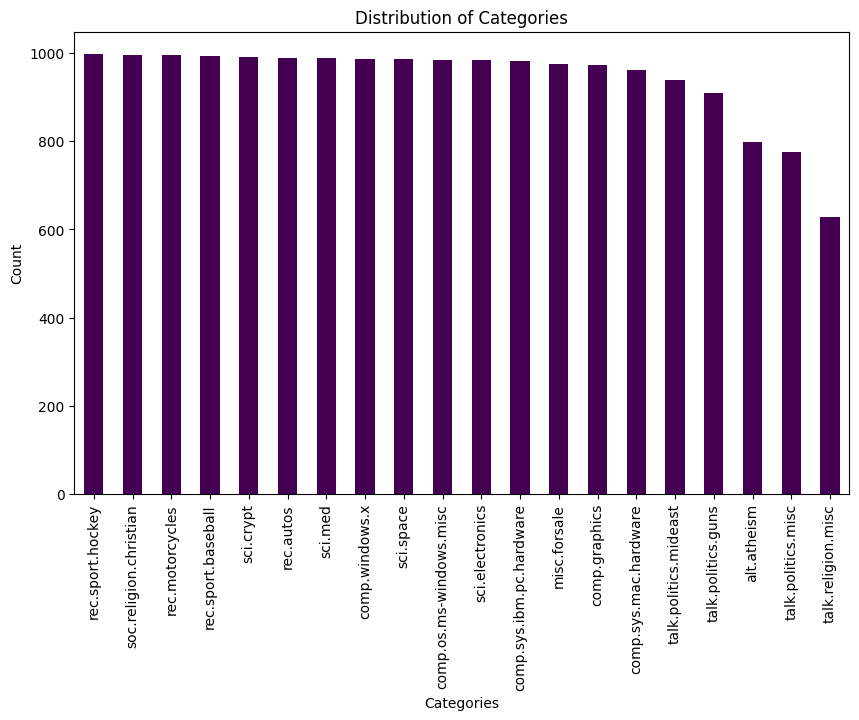

In [15]:
# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
df['labels'].value_counts().plot(kind='bar', colormap='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [16]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, stem_text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [18]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oleev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oleev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oleev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def preprocess_text(text):
    # Gensim preprocessing
    filters = [
        lambda x: x.lower(),           # Convert to lowercase
        strip_tags,                    # Remove HTML tags
        strip_numeric,                 # Remove numbers
        strip_punctuation,             # Remove punctuation
        strip_multiple_whitespaces     # Remove extra whitespaces
    ]
    text = ' '.join(preprocess_string(text, filters=filters))
    
    # NLTK preprocessing
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words] # Stopwords Removal
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words] # lemmatize words
    return ' '.join(lemmatized_words)


In [21]:
df.text[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [22]:
df_preprocessed=df.copy()

In [23]:
df_preprocessed['text'] = df['text'].apply(preprocess_text)


In [24]:
df_preprocessed['text'][0]

'sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled bit relieved however going put end non pittsburghers relief bit praise pen man killing devil worse thought jagr showed much better regular season stats also lot fo fun watch playoff bowman let jagr lot fun next couple game since pen going beat pulp jersey anyway disappointed see islander lose final regular season game pen rule'

In [25]:
def extract_features(text):
    tokens = word_tokenize(text)
    num_words = len(tokens)
    num_unique_words = len(set(tokens))
    lexical_diversity = num_words / num_unique_words if num_unique_words != 0 else 0
    return pd.Series([num_words, num_unique_words, lexical_diversity])

In [26]:
# Apply the function to the DataFrame
df_features = df_preprocessed['text'].apply(extract_features)
df_features.columns = ['Number of Words', 'Number of Unique Words', 'Lexical Diversity']


In [27]:
# Concatenate the features with the original DataFrame
df_combined = pd.concat([df_preprocessed, df_features], axis=1)

In [28]:
df_combined.columns

Index(['text', 'label', 'labels', 'Number of Words', 'Number of Unique Words',
       'Lexical Diversity'],
      dtype='object')

In [29]:
new_order = ['text','Number of Words', 'Number of Unique Words',
       'Lexical Diversity','label', 'labels',]
df_combined=df_combined[new_order]


In [30]:
df_combined

,text,Number of Words,Number of Unique Words,Lexical Diversity,label,labels
0,sure bashers pen fan pretty confused lack kind...,71.0,57.0,1.245614,10,rec.sport.hockey
1,brother market high performance video card sup...,35.0,29.0,1.206897,3,comp.sys.ibm.pc.hardware
2,finally said dream mediterranean new area grea...,115.0,93.0,1.236559,17,talk.politics.mideast
3,think scsi card dma transfer disk scsi card dm...,71.0,40.0,1.775000,3,comp.sys.ibm.pc.hardware
4,old jasmine drive use new system understanding...,55.0,40.0,1.375000,4,comp.sys.mac.hardware
...,...,...,...,...,...,...
18841,dn nyeda cnsvax uwec edu david nye dn neurolog...,165.0,120.0,1.375000,13,sci.med
18842,isolated ground recepticles usually unusual co...,18.0,17.0,1.058824,12,sci.electronics
18843,installed dx cpu clone motherboard tried mount...,50.0,36.0,1.388889,3,comp.sys.ibm.pc.hardware
18844,require hyper sphere space point specifies sph...,25.0,21.0,1.190476,1,comp.graphics


In [32]:
!python -m spacy download en_core_web_md


                                              0.0/42.8 MB ? eta -:--:--
                                              0.0/42.8 MB ? eta -:--:--
                                             0.0/42.8 MB 660.6 kB/s eta 0:01:05
                                              0.1/42.8 MB 1.1 MB/s eta 0:00:39
                                              0.2/42.8 MB 1.1 MB/s eta 0:00:38
                                             0.2/42.8 MB 958.4 kB/s eta 0:00:45
                                              0.3/42.8 MB 1.1 MB/s eta 0:00:39
                                              0.4/42.8 MB 1.2 MB/s eta 0:00:37
                                              0.4/42.8 MB 1.3 MB/s eta 0:00:34
                                              0.4/42.8 MB 1.3 MB/s eta 0:00:34
                                              0.5/42.8 MB 1.2 MB/s eta 0:00:37
                                              0.6/42.8 MB 1.2 MB/s eta 0:00:36
                                              0.6/42.8 MB 1.2 MB

2024-06-11 02:21:53.303301: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.5.0/en_core_web_md-3.5.0-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2024-06-11 02:22:21.721846: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import spacy


In [35]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_md') # en_core_web_md: 300 dimensions output vector

In [36]:
# Define a function to vectorize text using Tok2Vec
def tok2vec_text(text):
    doc = nlp(text)
    return doc.vector

In [37]:
df_vectorized=df_combined.copy()

In [38]:
df_vectorized['text']=df_combined['text'].apply(tok2vec_text)

In [39]:
df_vectorized.text[0]

array([-0.5290401 ,  1.3665133 , -0.80768013, -0.391093  ,  0.55689067,
        0.33154446,  1.8073161 ,  2.714442  , -2.6122181 , -0.07551432,
        3.7629652 ,  1.1847286 , -2.450965  ,  1.8070352 ,  1.8604664 ,
        0.3958476 ,  2.126121  , -0.5786323 , -0.15223409,  0.80713636,
        1.0492859 ,  1.4912091 , -0.3116918 , -2.1965754 , -0.5127056 ,
       -1.1329111 , -1.9686972 , -0.4791132 ,  1.7754751 ,  2.5724235 ,
        0.74684805,  0.02054464,  0.59592146, -1.7114164 ,  0.04092147,
       -0.69241256, -0.6097008 ,  1.333709  ,  1.8511705 ,  1.7939404 ,
       -0.0462229 ,  0.7908052 ,  0.9251741 , -1.0419655 ,  0.161952  ,
        0.9163266 ,  0.21859902, -2.6292315 , -0.8687938 ,  1.3844137 ,
        0.8892482 ,  0.7273922 ,  0.33432427, -2.805944  , -1.3874774 ,
        1.0836573 , -0.23773591,  1.4190973 ,  2.4199955 ,  1.1038015 ,
        0.6630726 ,  0.65135735, -0.5639538 , -2.07662   ,  0.35438547,
        1.0698111 , -2.7709599 , -2.1313617 , -1.3584014 ,  1.86

In [40]:
df_vectorized.text[0].shape


(300,)

In [41]:
df_vectorized

,text,Number of Words,Number of Unique Words,Lexical Diversity,label,labels
0,"[-0.5290401, 1.3665133, -0.80768013, -0.391093...",71.0,57.0,1.245614,10,rec.sport.hockey
1,"[-0.27918544, 0.26646057, -2.0142102, 0.874655...",35.0,29.0,1.206897,3,comp.sys.ibm.pc.hardware
2,"[-0.85621387, 0.5165809, -1.5286032, 0.0605149...",115.0,93.0,1.236559,17,talk.politics.mideast
3,"[-0.2679573, 1.6229212, -0.97719175, 0.5954116...",71.0,40.0,1.775000,3,comp.sys.ibm.pc.hardware
4,"[-1.3925172, 1.2192382, -1.3127025, 0.8323619,...",55.0,40.0,1.375000,4,comp.sys.mac.hardware
...,...,...,...,...,...,...
18841,"[0.08148231, 1.3002092, -1.4304898, 0.08138586...",165.0,120.0,1.375000,13,sci.med
18842,"[-1.1234587, 0.40256727, -1.458515, 2.0014877,...",18.0,17.0,1.058824,12,sci.electronics
18843,"[-0.80695814, 2.2261071, -2.3406491, 2.7006981...",50.0,36.0,1.388889,3,comp.sys.ibm.pc.hardware
18844,"[0.24530001, 2.7510352, -1.6876504, -0.2093403...",25.0,21.0,1.190476,1,comp.graphics


In [42]:
import torch as tr
X=df_vectorized['text']
y = tr.tensor(df_vectorized['label'])
features = df_vectorized.drop(['text', 'label','labels'], axis=1)
feature_names = features.columns.tolist()

In [43]:
df_vectorized.dtypes

text                       object
Number of Words           float64
Number of Unique Words    float64
Lexical Diversity         float64
label                       int32
labels                     object
dtype: object

In [44]:
import torch as tr
X = list(df_vectorized['text'])
X = tr.tensor(X)


C:\Users\oleev\AppData\Local\Temp\ipykernel_18388\438292807.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  X = tr.tensor(X)


In [45]:
X.dtype

torch.float32

In [46]:
y=tr.tensor(y)

C:\Users\oleev\AppData\Local\Temp\ipykernel_18388\2333355630.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=tr.tensor(y)


In [47]:
import pickle

# Save to a pickle file
with open('vectorized_data.pkl', 'wb') as file:
    pickle.dump(df_vectorized, file)


In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
print(clusters)

[1 0 1 ... 0 1 1]


In [49]:
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import numpy as np

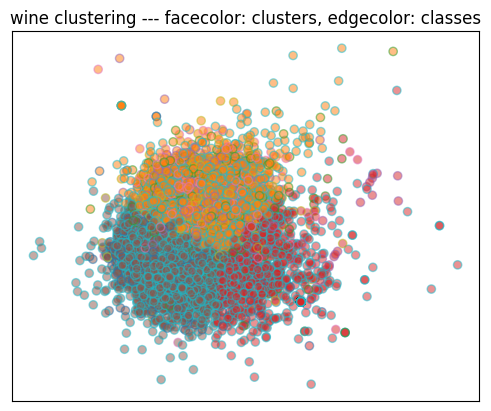

In [56]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment


C = contingency_matrix(clusters, y)
_, best_match = linear_sum_assignment(-C.T)
Y = tr.tensor([best_match[i] for i in clusters])

# compute a PCA embedding for visualization
pca = PCA(n_components=2).fit(X)
Z = pca.transform(X)

cmap = plt.get_cmap('tab10')


plt.title('wine clustering --- facecolor: clusters, edgecolor: classes')
plt.scatter(Z[:,0], Z[:,1], facecolor=cmap(2*Y.numpy() + 1), edgecolor=cmap(2*y.numpy()), alpha=.5)
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])
plt.show()

In [57]:
logits = kmeans.transform(X)

In [58]:
print(X)

tensor([[-0.5290,  1.3665, -0.8077,  ...,  0.3007, -1.9625,  0.2906],
        [-0.2792,  0.2665, -2.0142,  ..., -1.0646, -1.7199,  0.7435],
        [-0.8562,  0.5166, -1.5286,  ...,  0.3095, -1.0906,  1.0686],
        ...,
        [-0.8070,  2.2261, -2.3406,  ..., -1.2892, -2.0393,  1.4226],
        [ 0.2453,  2.7510, -1.6877,  ..., -0.1302, -2.5999,  1.1655],
        [-0.1860,  0.4661, -1.6769,  ..., -0.6831, -0.9945,  0.7823]])


In [62]:
from neon import NeuralizedKMeans, neon
X_tensor = torch.tensor(X, dtype=torch.double)
neural_kmeans = NeuralizedKMeans(kmeans)
logits = kmeans.transform(X_tensor)
R = neon(neural_kmeans, X_tensor, beta=1)


C:\Users\oleev\AppData\Local\Temp\ipykernel_18388\3802794023.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.double)


AttributeError: 'KMeans' object has no attribute 'centroids'

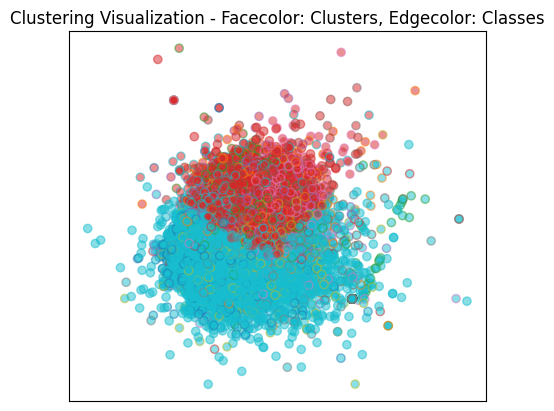

In [ ]:
# Compute PCA embedding
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)

# Compute the best match between clusters and classes
C = contingency_matrix(df_combined['label'], clusters)
_, cluster_labels_mapped = linear_sum_assignment(-C.T)
y = np.array([cluster_labels_mapped[i] for i in clusters])

# Visualize the results
plt.title('Clustering Visualization - Facecolor: Clusters, Edgecolor: Classes')
plt.scatter(Z[:, 0], Z[:, 1], facecolor=plt.get_cmap('tab10')(y), edgecolor=plt.get_cmap('tab10')(df_combined['label']), alpha=0.5)
plt.gca().set_aspect('equal')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from neon import NeuralizedKMeans, neon


In [ ]:
df_vectorized["text"]

0        [-0.5290401, 1.3665133, -0.80768013, -0.391093...
1        [-0.27918544, 0.26646057, -2.0142102, 0.874655...
2        [-0.85621387, 0.5165809, -1.5286032, 0.0605149...
3        [-0.2679573, 1.6229212, -0.97719175, 0.5954116...
4        [-1.3925172, 1.2192382, -1.3127025, 0.8323619,...
                               ...                        
18841    [0.08148231, 1.3002092, -1.4304898, 0.08138586...
18842    [-1.1234587, 0.40256727, -1.458515, 2.0014877,...
18843    [-0.80695814, 2.2261071, -2.3406491, 2.7006981...
18844    [0.24530001, 2.7510352, -1.6876504, -0.2093403...
18845    [-0.18604699, 0.466077, -1.6769196, 0.04467887...
Name: text, Length: 18846, dtype: object

In [ ]:
logits = kmeans.transform(X_scaled)

In [ ]:
kmeans= NeuralizedKMeans(kmeans)

In [ ]:
import torch 
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.double)
R = neon(kmeans, X_scaled_tensor, beta=1)



In [ ]:
print("Logits:", logits)
print("Explanations:", R)

Logits: [[0.90578554 1.05406499 0.72978011]
 [0.71307485 0.9969239  0.89491406]
 [0.78300247 0.86999521 0.4401516 ]
 ...
 [0.95705921 1.43006094 1.1709177 ]
 [0.91744575 1.42412403 0.86077556]
 [0.45190102 0.87605581 0.4400618 ]]
Explanations: tensor([[ 7.7009e-05,  9.8903e-05, -8.3769e-04,  ...,  3.1810e-03,
          1.1612e-03, -1.1325e-03],
        [ 3.4802e-05, -3.7220e-04,  7.4700e-04,  ...,  2.1226e-03,
          7.6209e-04,  4.6622e-04],
        [ 5.2402e-04,  6.5182e-05,  2.3327e-03,  ...,  2.9943e-03,
         -8.3474e-04,  1.3752e-03],
        ...,
        [-4.1466e-05,  8.6484e-04, -8.7956e-04,  ...,  3.1195e-03,
          3.4076e-04,  4.9030e-05],
        [-4.3206e-04, -6.6605e-04,  1.1228e-03,  ...,  2.3185e-03,
          1.0230e-03,  4.7416e-04],
        [-1.4315e-04,  1.2929e-04,  8.5557e-04,  ..., -1.6876e-04,
         -5.5639e-04, -1.0228e-04]], dtype=torch.float64)


In [ ]:
explanations = R.detach().cpu().numpy()

In [ ]:
# Create a DataFrame for explanations
explanations_df = pd.DataFrame(explanations, columns=[f'feature_{i+1}' for i in range(explanations.shape[1])])
explanations_df['original_data'] = X
explanations_df['cluster'] = clusters

In [ ]:
# Display explanations
print("Logits:", logits)
print(explanations_df.head())

Logits: [[0.90578554 1.05406499 0.72978011]
 [0.71307485 0.9969239  0.89491406]
 [0.78300247 0.86999521 0.4401516 ]
 ...
 [0.95705921 1.43006094 1.1709177 ]
 [0.91744575 1.42412403 0.86077556]
 [0.45190102 0.87605581 0.4400618 ]]
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.000077   0.000099  -0.000838   0.000892  -0.003947   0.000049   
1   0.000035  -0.000372   0.000747   0.001810   0.003485   0.001990   
2   0.000524   0.000065   0.002333   0.000049   0.009269   0.001019   
3   0.000046   0.000716   0.000862   0.001223   0.003402   0.000428   
4  -0.000339   0.000194   0.000058   0.001699   0.000158   0.000321   

   feature_7  feature_8  feature_9  feature_10  ...  feature_293  feature_294  \
0   0.001194   0.003006  -0.000513    0.000091  ...    -0.001168    -0.002225   
1   0.000462   0.001407   0.013377   -0.000259  ...    -0.000642     0.001488   
2   0.000675   0.004504   0.005869   -0.000051  ...     0.000401     0.000161   
3   0.000284   0.00

In [ ]:
data_point_index = 0  # Change this to any index you want to inspect
print(f"\nOriginal data point {data_point_index}: {explanations_df['original_data'].iloc[data_point_index]}")
print(f"Assigned cluster: {explanations_df['cluster'].iloc[data_point_index]}")
print("Feature relevances:")
print(explanations_df.drop(['original_data', 'cluster'], axis=1).iloc[data_point_index])


Original data point 0: [-0.5290401   1.3665133  -0.80768013 -0.391093    0.55689067  0.33154446
  1.8073161   2.714442   -2.6122181  -0.07551432  3.7629652   1.1847286
 -2.450965    1.8070352   1.8604664   0.3958476   2.126121   -0.5786323
 -0.15223409  0.80713636  1.0492859   1.4912091  -0.3116918  -2.1965754
 -0.5127056  -1.1329111  -1.9686972  -0.4791132   1.7754751   2.5724235
  0.74684805  0.02054464  0.59592146 -1.7114164   0.04092147 -0.69241256
 -0.6097008   1.333709    1.8511705   1.7939404  -0.0462229   0.7908052
  0.9251741  -1.0419655   0.161952    0.9163266   0.21859902 -2.6292315
 -0.8687938   1.3844137   0.8892482   0.7273922   0.33432427 -2.805944
 -1.3874774   1.0836573  -0.23773591  1.4190973   2.4199955   1.1038015
  0.6630726   0.65135735 -0.5639538  -2.07662     0.35438547  1.0698111
 -2.7709599  -2.1313617  -1.3584014   1.867722    1.3863695  -0.25746897
 -0.7094904  -0.9128907   0.66493887  0.8850033  -0.64042044  0.58938843
 -0.43228444 -0.4239387  -2.7994382  

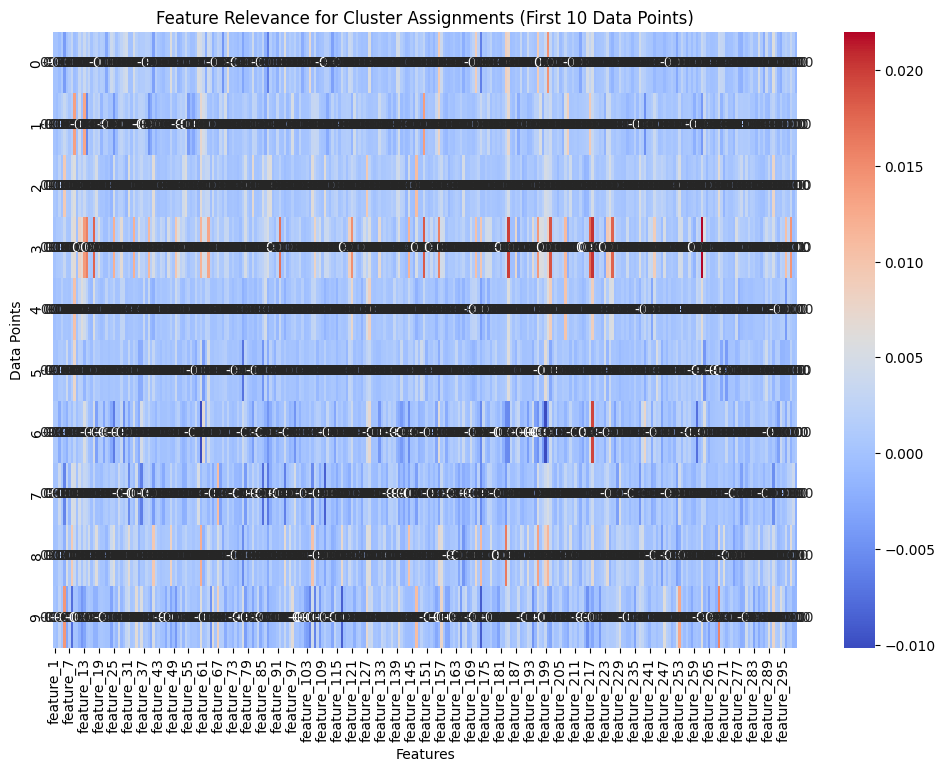

In [ ]:
import seaborn as sns

# Select a subset of the data for visualization
subset_size = 10  # You can change this number to visualize more or fewer data points
explanations_subset = explanations_df.head(subset_size)

# Visualize the relevance of features for each cluster assignment
plt.figure(figsize=(12, 8))
sns.heatmap(explanations_subset.drop(['original_data', 'cluster'], axis=1), annot=True, fmt='.2f', cmap='coolwarm')
plt.title(f'Feature Relevance for Cluster Assignments (First {subset_size} Data Points)')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()


In [ ]:
# Check the dimensions of the vectorized data
print(f'Number of features: {X_scaled.shape[1]}')


Number of features: 300


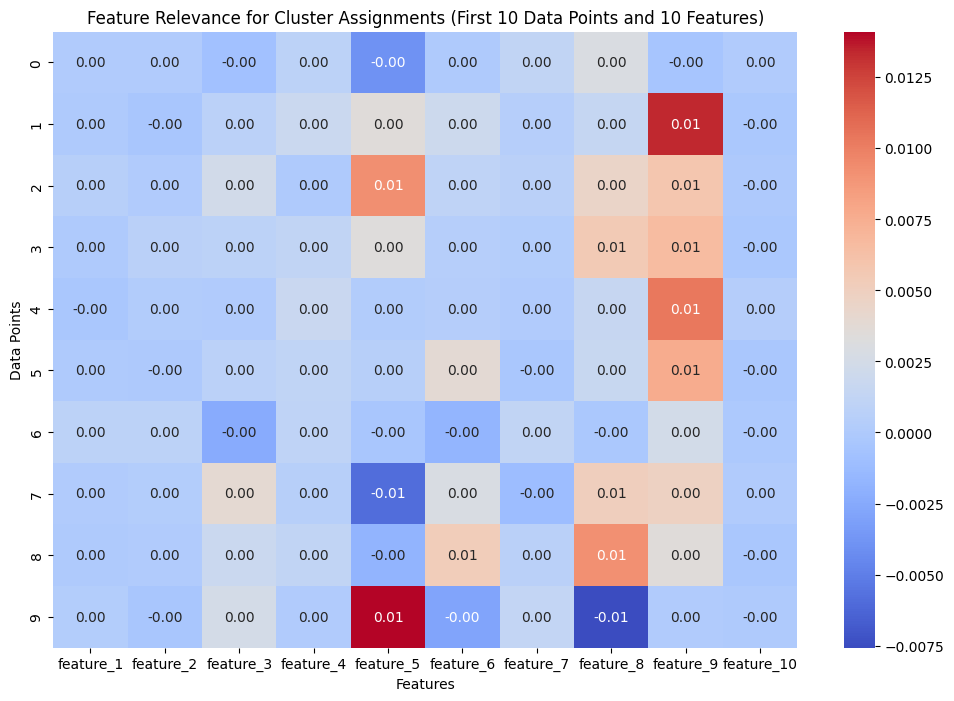

In [ ]:
# Create a DataFrame for explanations
num_features = explanations.shape[1]
explanations_df = pd.DataFrame(explanations, columns=[f'feature_{i+1}' for i in range(num_features)])
explanations_df['original_data'] = [str(data) for data in X]  # Convert original data to string for display
explanations_df['cluster'] = clusters

# Select a subset of the data and features for visualization
subset_size = 10  # Number of data points to visualize
num_visual_features = 10  # Number of features to visualize
explanations_subset = explanations_df.head(subset_size).iloc[:, :num_visual_features]

# Visualize the relevance of features for each cluster assignment
plt.figure(figsize=(12, 8))
sns.heatmap(explanations_subset, annot=True, fmt='.2f', cmap='coolwarm')
plt.title(f'Feature Relevance for Cluster Assignments (First {subset_size} Data Points and {num_visual_features} Features)')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

In [ ]:
ytrue =  tr.tensor(df_combined['label'])
ytrue

tensor([10,  3, 17,  ...,  3,  1,  7], dtype=torch.int32)

C:\Users\oleev\AppData\Local\Temp\ipykernel_27496\608303298.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ytrue_tensor = tr.tensor(ytrue)


data point 0
  true class        : 10
  cluster assignments (probabilities):
    Class 0: 0.33
    Class 1: 0.39
    Class 2: 0.28
  sum(R) / logits    : 0.2879 / [0.9057855424222758, 1.0540649942742284, 0.7297801082251544]


AttributeError: 'numpy.ndarray' object has no attribute 'clamp'

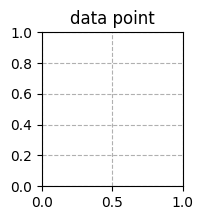

In [ ]:
from utils import *
import torch as tr

# Assuming y and ytrue are boolean arrays or lists
y_tensor = tr.tensor(y)
ytrue_tensor = tr.tensor(ytrue)

I = tr.nonzero(y_tensor != ytrue_tensor)[:,0]

for i in I:
    logits_i = logits[i]  # No need to convert to PyTorch tensor
    probs = tr.softmax(tr.tensor(logits_i), dim=0)  # Convert logits to probabilities using softmax

    print('data point %d'%i)
    print('  true class        : %d'%ytrue[i])
    print('  cluster assignments (probabilities):')
    for class_idx, prob in enumerate(probs):
        print('    Class %d: %.2f' % (class_idx, prob.item()))

    print('  sum(R) / logits    : %.4f / %s' % (sum(R[i]), logits_i.tolist()))
    
    # Plotting explanation
    plot_explanation(X[i], R[i], df_features)
    plt.show()
    print('-'*80)


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
